-------------------------
#### Aim : try regression model on automobiles dataset
- understand the ML and metrics
- after removal of 'year' column
- encode the `origin` column with OHE (one hot encoding)
- the rows with horsepower= "?" are replace with the mean value of the horsepower column
---------------------------------

**About the dataset**
The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository https://www.kaggle.com/uciml/autompg-dataset

(a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

The dataset was used in the 1983 American Statistical Association Exposition.

Attribute Information:

|column name | type of column|
|------------|---------------|
|`mpg`: |continuous|
|`cylinders`: |multi-valued discrete|
|`displacement`: |continuous|
|`horsepower`: |continuous|
|`weight`: |continuous|
|`acceleration`: |continuous|
|model year: |multi-valued discrete|
|origin: |multi-valued discrete|
|car name: |string (unique for each instance)|

Missing Attribute Values: horsepower has 6 missing values

In [2]:
import pandas as pd
import numpy as np

# import the ML algorithm
from sklearn.linear_model import LinearRegression

In [3]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/auto-mpg.csv"

In [4]:
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
df_training.drop(['car name'], axis=1, inplace=True)

In [7]:
df_training

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(398, 8)

In [9]:
df_training.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


check for datatypes
- look for any string/char (OBJECT)
    - ML does not accept the OBJECT columns
        - OBJECT -> numeric (ENCODING)

In [8]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [9]:
np.unique(df_training['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [10]:
df_training[df_training['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2


#### What do we do with the "?" in the horsepower column?

1. drop the rows which have the "?" in the horsepower column

2. replace the "?" in the horsepower column

    - average value 
    - fixed value
    - predict for each of "?" (using KNN) - ADVANCE OPTION

##### option 2 : We shall fill in the ? values with the average value in the horsepower column

In [15]:
# get the indexes of the rows where horsepower = '?'
# drop the rows (above indexes)
indx = df_training[df_training['horsepower'] == '?'].index
indx

Int64Index([32, 126, 330, 336, 354], dtype='int64')

In [25]:
df_without_qs_mark = df_training[df_training['horsepower'] != '?'].copy()

In [26]:
df_without_qs_mark

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1


In [27]:
df_without_qs_mark['horsepower'] = df_without_qs_mark['horsepower'].astype('float64')

In [28]:
df_without_qs_mark.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


replace the ? values in df_training with 104.469388

In [31]:
mask = df_training.horsepower == '?'

In [34]:
df_training.loc[mask, 'horsepower'] = 104.469

In [35]:
df_training['horsepower'] = df_training['horsepower'].astype('float64')

In [36]:
df_training[df_training['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin


In [37]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [38]:
import seaborn as sns

#### 1. check for linearity of the data

- Column X must have linear pattern with the y column
    - X = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
    - y = 'horsepower'

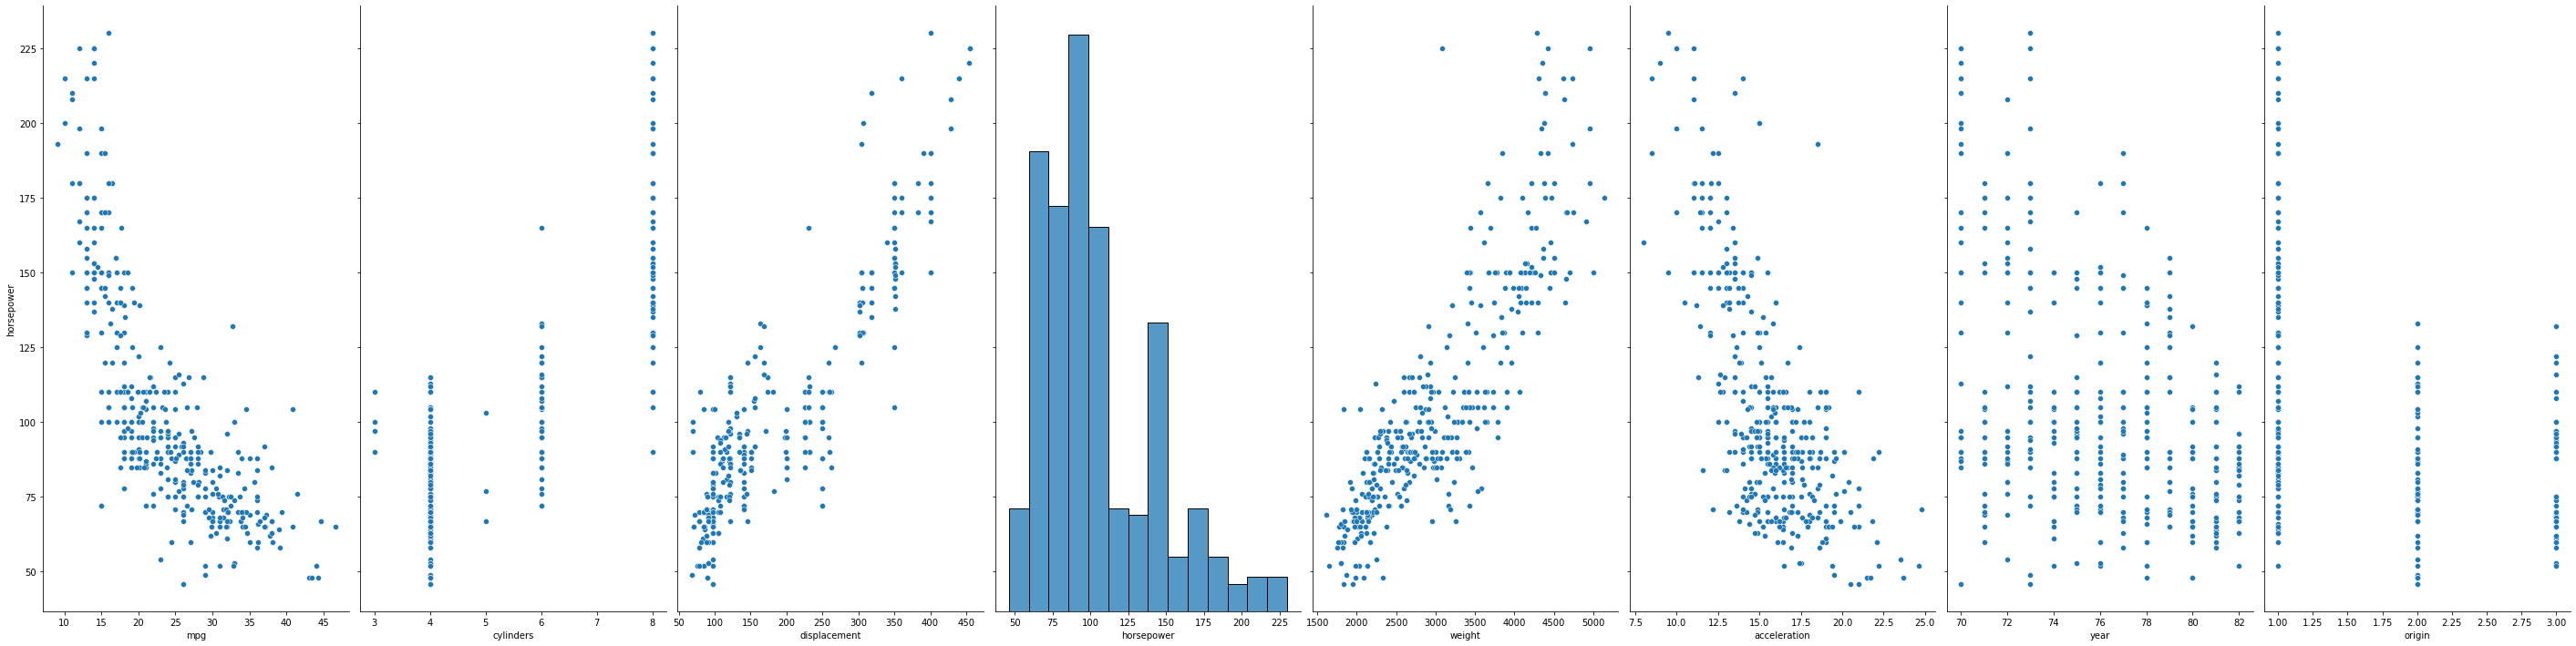

In [39]:
sns.pairplot(df_training,
             x_vars= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'], 
             y_vars='horsepower', 
             height=10, 
             aspect=.5, 
             #kind='reg'
            );

In [40]:
np.unique(df_training['origin'])

array([1, 2, 3], dtype=int64)

Some comments on `origin` col
- looks like code for the country of make of the car 
    - US , Canada, Japan..
    
- data is ordinal
    - but the name of col suggests we dont need ORDINALITY

##### convert the `origin` column to one_hot encoding format

In [41]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

so we need to convert the `origin` col to OBJECT type - so we can apply OHE

In [42]:
df_training['origin'] = df_training['origin'].astype('object')

In [43]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin           object
dtype: object

In [44]:
df_training_dummies = pd.get_dummies(df_training, drop_first = True)

In [45]:
df_training_dummies.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
347,37.0,4,85.0,65.0,1975,19.4,81,0,1
140,14.0,8,304.0,150.0,4257,15.5,74,0,0
193,24.0,6,200.0,81.0,3012,17.6,76,0,0
145,32.0,4,83.0,61.0,2003,19.0,74,0,1
241,22.0,6,146.0,97.0,2815,14.5,77,0,1


#### 2. check for correlation

In [46]:
import matplotlib.pyplot as plt

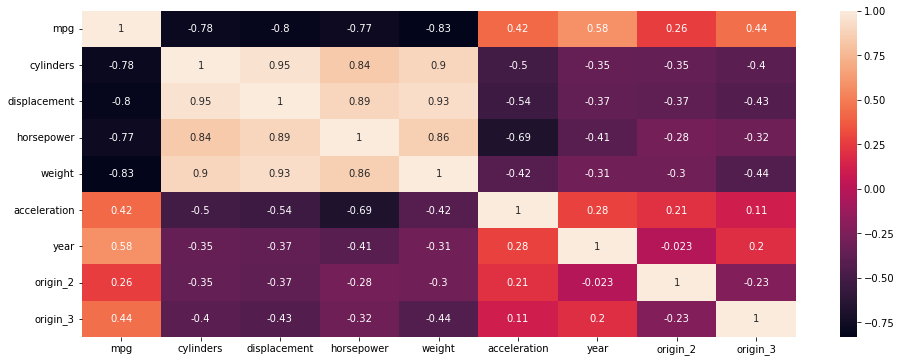

In [47]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_training_dummies.corr(), annot=True);

#### 3. build our ML model (regression)

- prepare the data for training and testing

In [48]:
# create a Python list of feature names
feature_cols = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'origin_2','origin_3']

# use the list to select a subset of the original DataFrame
X = df_training_dummies[feature_cols]

# select a Series from the DataFrame
y = df_training_dummies['horsepower']

- holdout method for evaluation

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [51]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(277, 7)
(277,)
(120, 7)
(120,)


- commission our ML model

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

the model
- horsepower =  b0
                b1 * mpg +
                b2 * cylinders +
                b3 * displacement +
                b4 * weight +
                b5 * acceleration +
                b6 * year +
                b7 * origin

#### Evaluation of the model

In [54]:
y_pred = model.predict(X_test)

- use regression metrics to judge the goodness of the model

In [55]:
from sklearn import metrics

In [56]:
# Model evaluation metrics for regression
# print('y-intercept             : ', linreg.intercept_)
# print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  9.115119055332322
Mean Sq  Error MSE      :  168.3653960492848
Root Mean Sq Error RMSE :  12.975569199433403
MAPE                    :  8.464500278334391
MPE                     :  -2.1390686791225764
r2 value                :  0.8924167800723837


#### Summary

In this model, the horsepower column which "?", were not dropped. Instead we replaced the "?" mark with the mean value of the column

the outcome of the model is slightly `degraded` compared to the model where the horsepower = "?" are dropped


Key principle is 
- DO NOT DROP ROWS